# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Hierarchical Clustering for Deduplication

**Steps**:
1. Data Set: Obtain a dataset containing duplicate employee information.
2. Perform Clustering: Use hierarchical agglomerative clustering to cluster the employee
records.
3. Evaluate Duplicates: Determine duplicates by analyzing the clusters formed.
4. Clean Data: Remove duplicate employee records found during clustering.

Original Dataset:
     EmployeeName               Email
0  Alice Johnson   alice@example.com
1  Alyce Johnson   alyce@example.com
2      Bob Stone     bob@example.com
3   Robert Stone     rob@example.com
4     Jane Smith    jane@example.com
5     Jane Smyth  jane.s@example.com
6       John Doe    john@example.com
7        Jon Doe     jon@example.com


/tmp/ipykernel_27367/89051157.py:38: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method='average'))


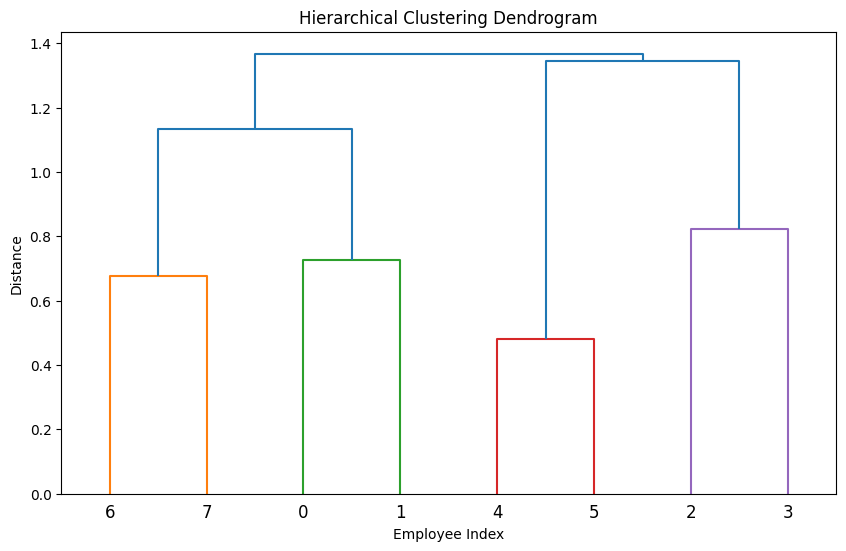


Deduplicated Records:
     EmployeeName              Email
0     Jane Smith   jane@example.com
1   Robert Stone    rob@example.com
2        Jon Doe    jon@example.com
3  Alyce Johnson  alyce@example.com
4      Bob Stone    bob@example.com
5  Alice Johnson  alice@example.com
6       John Doe   john@example.com


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Step 1: Simulated Employee Dataset with Duplicates
data = {
    'EmployeeName': [
        'Alice Johnson', 'Alyce Johnson', 'Bob Stone', 'Robert Stone',
        'Jane Smith', 'Jane Smyth', 'John Doe', 'Jon Doe'
    ],
    'Email': [
        'alice@example.com', 'alyce@example.com', 'bob@example.com', 'rob@example.com',
        'jane@example.com', 'jane.s@example.com', 'john@example.com', 'jon@example.com'
    ]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

# Step 2: Vectorize names and emails using TF-IDF
combined = df['EmployeeName'] + ' ' + df['Email']
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
X = vectorizer.fit_transform(combined)

# Step 3: Perform Hierarchical Clustering
distance_matrix = cosine_distances(X)
model = AgglomerativeClustering(n_clusters=None, metric='precomputed',
                                 linkage='average', distance_threshold=0.4)

df['Cluster'] = model.fit_predict(distance_matrix)

# Optional: Dendrogram to visualize clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method='average'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Employee Index")
plt.ylabel("Distance")
plt.show()

# Step 4: Evaluate and Remove Duplicates (keep one per cluster)
deduplicated_df = df.groupby('Cluster').first().reset_index(drop=True)
print("\nDeduplicated Records:\n", deduplicated_df)